<a href="https://colab.research.google.com/github/kotgirep/clusteringalgos/blob/main/255Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CMPE-255 Hierarchical Clustering


Import all the required libraries

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data preparation:

1.Read and parse the CSVfile using the pandas Dataframe.

2.Removed all the null values and unwanted columns and invalid/blank rows.

Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


On the supplied dataset, we're going to use hierarchical clustering. Each data is first treated as its own cluster in hierarchical clustering. The following 2 steps are then repeated:

1.combine the two most similar clusters after identifying the two clusters that are closest to each other. 

2.This process is repeated until all clusters have been integrated.

A dendrogram, that depicts the hierarchical link among clusters, is the major result of Hierarchical Clustering. The difference between two was calculated using the size of the single direction formed between them. The Euclidean distance is the name given to this region.

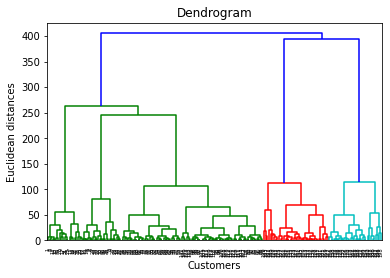

In [5]:
# Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward' ))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [8]:
# Fitting the hierarchical clustering to the mall dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(X)

Visualising the clusters

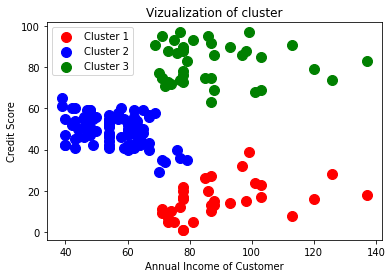

In [12]:
# Visualising the clusters
plt.scatter(X[Y_hc == 0, 0], X[Y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[Y_hc == 1, 0], X[Y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y_hc == 2, 0], X[Y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Vizualization of cluster')
plt.xlabel('Annual Income of Customer')
plt.ylabel('Credit Score')
plt.legend()
plt.show()

Conclusion:

We've created a visual representation of Credit card score visibility and Annual income of customers.Our data was divided into three clusters using hierarchical clustering. So, based on this graph, we may conclude following.

1. Cluster 1 has a modest level of spending score with a high level of Annual Income.

2. Cluster 2 comprises customers with limited spending score and low Annual Income.

3. Cluster 3 features customers with aspending score from low to moderate, resulting in an average spending score for those customers.

